# SYMPY code for total cross section from a given amplitude

In [1]:
################################################################################
# PYTHON's MODULAE
# ------------------------------------------------------------------------------
################################################################################
import os
import sys
# module_path = os.path.abspath(os.path.join('/lib/python3.10/site-packages'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
#from operator import indexOf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import pandas as pd
import matplotlib.colorbar as colorb
## Saves the results for sigmaz locally
import os
from scipy.integrate import quad

### newmodules
import sympy
from sympy import I as Im
from sympy import conjugate
from sympy import sympify, symbols, simplify, Symbol, Mul, expand
from sympy.parsing.latex import parse_latex
import antlr4

#pip install latexify-py


# Steps for SYMPY calculation

In [ ]:
    #raw_form_q = eps3 eps4 [g_alh_beta qvec dot (p3 - p4)  + q_alpha dot (p4 + qvec)_beta - qvec_beta (k3 + qvec)_alpha  ]
    
    #raw_form_q = eps3 eps4 [g_alh_beta qvec dot (p3 - p4)  + q_alpha dot (p4 + qvec)_beta - qvec_beta (k3 + qvec)_alpha  ]
    
    # raw_form = eps4^alpha eps3^beta [g_alph_beta  (p3 - p4)^mu  + g_alpha_mu dot (p4 + qvec)_beta - g_beta_mu (k3 + qvec)_alpha  ]

    ## é ISSO, usando qvec = (p3+p4) é o mesmo resultado
    # raw_form =        eps4 dot eps3 * (p3 - p4)^mu   # ---> s1 * (p4[0] - p3[0])
    #                  + eps4_mu dot (eps3.p4 + eps3.p4)) # ---> 2 * s2 * eps4[0]
    #                  - eps3_mu (eps4.k3 + eps4.qvec)  #-->2 * s2 * eps4[1] 

In [2]:
import sympy
print(sympy.__file__)

/home/marcio/.local/lib/python3.10/site-packages/sympy/__init__.py


## Auxiliary Functions

In [3]:
# Function to search for a symbol in a expression
def find_symbol(expr, target: str):
    for symbol in expr.free_symbols:
        if symbol.name == target:
            return symbol
    print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
    return None

# Unify the symbols of different expressions
def unify_symbols(expr1, expr2):
    symbols_expr1 = set([x.name for x in expr1.free_symbols])
    symbols_expr2 = set([x.name for x in expr2.free_symbols])

    common_symbols = symbols_expr1.intersection(symbols_expr2)
    #print(common_symbols)

    symbol_mapping = {}
    for symbol in common_symbols:
        new_symbol = Symbol(symbol)
        symbol_mapping[symbol] = new_symbol

    #print(symbol_mapping)
    expr1 = expr1.subs(symbol_mapping)
    expr2 = expr2.subs(symbol_mapping)

    return expr1, expr2

# Define LaTeX expressions
# Parse the LaTeX expressions - EXAMPLE
# Unify symbols with the same text names
#unified_expr1, unified_expr2 = unify_symbols(expr1, expr2)
#dl.replace(dl.args[1].args[0], n)
#print("Unified Expression 1:", unified_expr1)
#print("Unified Expression 2:", unified_expr2)


def symbol_replacer(expr, target, subsymbol):
    return 0

In [4]:
def amp_somm_corr_squared():

    # LaTeX expressions Eq 2.35
    exprn =  r"\sum_{n=0}^{n} \alpha_{n}  p^{l + 2 n}"
    exprnp = r"\sum_{n'=0}^{n'} \alpha_{n'} p^{l + 2 n'}"  ## need to conjugate
    

    # n factors
    factn = parse_latex(exprn)
    Dln = dln(r"n")
    imag = Im ## imaginary part
    Dln = Dln.replace(find_symbol(Dln, 'i'), imag)
    factn, Dln = unify_symbols(factn, Dln)
    factn = factn * Dln
    
    
    # n' factors
    factnp = parse_latex(exprnp)
    Dlnp = dln(r"n'")
    Dlnp = Dlnp.replace(find_symbol(Dlnp, 'i'), conjugate(imag))
    factnp, Dlnp = unify_symbols(factnp, Dlnp)
    factnp = factnp * Dlnp
    
    ## full expression f(n)*f(n')^*
    factn, factnp = unify_symbols(factn, factnp)
    result = factn * factnp

    ## replace alphas by its proper symbols
    an = symbols(r"\alpha_{n}")
    anp = symbols(r"\alpha_{n'}")
    result = result.replace(find_symbol(factn, "alpha_{n}"), an)
    result = result.replace(find_symbol(factnp, "alpha_{n'}"), conjugate(anp))

    ## apply Sommerfeld from eq 2.36
    Slx = somm_corr() ## Eq 2.36 -- Sommerfeld correction for a Colomb potential
    Slx, result = unify_symbols(Slx, result)


    # Final result
    result = Slx * result
    #result = result.replace(find_symbol(result, 'i'), imag)
    return result

# Test 
sommerfeld = amp_somm_corr_squared()
amp_somm_corr_squared()

NameError: name 'dln' is not defined

In [ ]:
## CODE TO CONVERT THE GENERATED EXPRESSION INTO A PYTHON FUNCTION## 

# from sympy import symbols, sin
# from sympy.utilities.lambdify import lambdify
# import inspect
# import math

# function = lambdify(['e', 'pi', 'x'], somm.doit(), 'numpy')

# # 
# # result = function(0.5)
# # print("Function result:", result)

# function(math.e, np.pi, 3)

# import inspect
# import math
# inspect.getsource(function)

## Model Lagrangian 

#### Generate python function from SymPy expression

In [ ]:
## Latex lagrangian translator

## Convert the latex code into a python object
def latex_lag(lag):


    lag_obj = lag


    return lag_obj

# Test

latex_lag(0)

In [2]:
import sympy as sp

sp.gamma('μ')

gamma(μ)

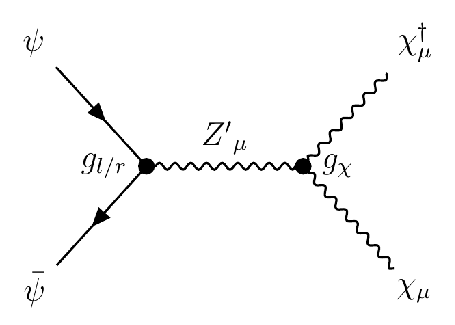 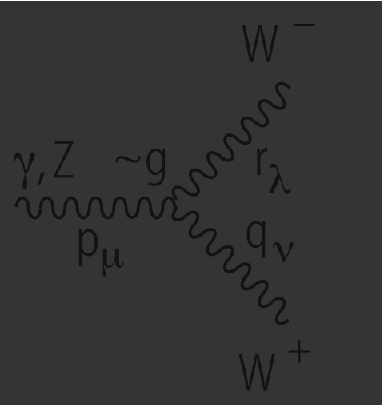

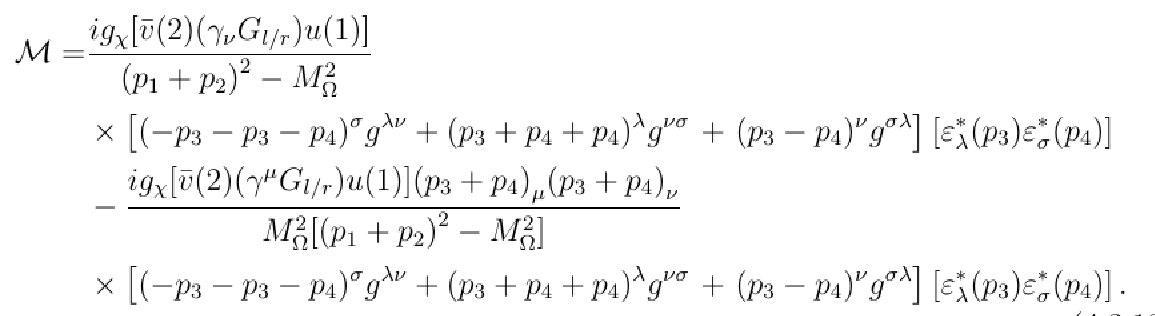

In [3]:

# Glr = gl ((1 - DiracGamma[5])/2) + gr  ((1 + DiracGamma[5])/2);
# Glrx = glx ((1 - DiracGamma[5])/2) + grx  ((1 + DiracGamma[5])/2);
# ub3 = SpinorUBar[k2, mx];
# v4 = SpinorV[k1, mx];
# vb2 = SpinorVBar[p2, mq];
# u1 = SpinorU[p1, mq];

# p = k1 + k2;
# r = - k1;
# q = -k2;


# Zpropagator = (-I (MetricTensor[\[Mu], \[Sigma]] - (1/
#           M^2) (FourVector[k1 + k2, \[Mu]] FourVector[
#            k1 + k2, \[Sigma]])))/((s - 
#        M^2) + (I (M  \[CapitalGamma])));
# partialaMp = (vb2 . (I DiracMatrix[\[Sigma]] . Glr) . u1) . 
#    Zpropagator . ((I gxv) (FourVector[p - q, \[Lambda]] . 
#         MetricTensor[\[Mu], \[Nu]] + 
#        FourVector[r - p, \[Nu]] . MetricTensor[\[Mu], \[Lambda]] + 
#        FourVector[q - r, \[Mu]] . 
#         MetricTensor[\[Nu], \[Lambda]])) . (Conjugate[
#       PolarizationVector[k1, \[Lambda], Transversality -> True]] . 
#      Conjugate[PolarizationVector[k2, \[Nu], Transversality -> True]]);
# ampDM = Simplify[I (partialaMp)]

## Professor Berger Tutorial - eeWW

-> Modifications by me, original, see the notebook

In [1]:
from sympy import *
import prof_berger.heppackv0 as hep 

Reading heppackv0.py (March 2023)

Done


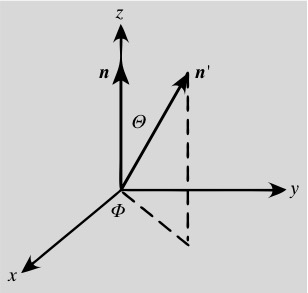

In [2]:
theta,u,t,r=symbols('theta u t r',real=True)
s,p=symbols('s p',positive=True)
M1,M2,m=symbols('M1 M2 m',real=True)
g,c1,c2=symbols('g c1 c2')

In [ ]:
## Functions used

# def fourvec(pp):
#         elm1=pp[0]
#         elm2=pp[1]
#         elm3=pp[2]
#         elm4=pp[3]
#         h0=elm3/2
#         h1=2*sin(h0)*cos(h0)
#         h2=cos(h0)**2-sin(h0)**2
#         p=sqrt(elm1**2-elm2**2)
#         result=[elm1,p*h1*cos(elm4),p*h1*sin(elm4),p*h2]
#         return result

In [6]:
pi

### 1) $e^-_+e^+_+\to W^-_0W^+_0$ Standard weak interaction

In [23]:
## Professor dict
# theta =  \theta = theta angle from R3 representation
# pi = π = $\pi$ = 3.1415....
# p1, p2, p3... = fourmomenta components written as vectors, as (E, m, angle(phi), angle(theta)) 
# 

p1=[p, m, 0, 0]
p2=[p, m, pi, pi]
k1=[p, M1, theta, 0]
k2=[p, M1, pi - theta, pi]

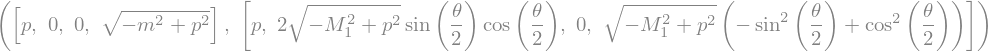

In [24]:
# fourvec calculates E, p_x,p_y,p_z from E, m, theta, phi

pe = hep.fourvec(p1)
ka = hep.fourvec(k1)
pe, ka

---

$$ \texttt{qdag} =  {k_1}\!\!\!\!\!/ - {p_1}\!\!\!\!\!/  $$

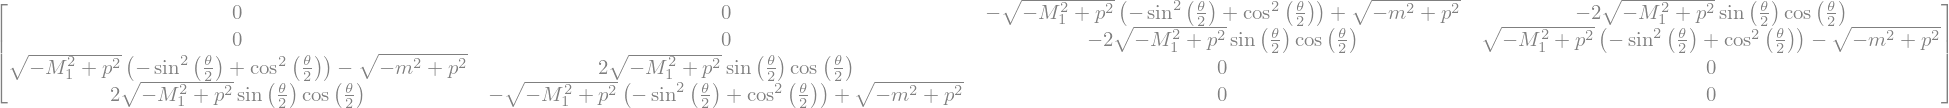

In [25]:
## dag evaluates the dagger matrix as defined in chapter 3.1 - From Elementarteilchenphysik - BERGER

qdag = hep.dag(ka) - hep.dag(pe)
qdag

---

$$ \texttt{eps1dag} =  \bar \epsilon(k_1, m) \!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!/ $$ 
$$ \texttt{eps2dag} =  \bar \epsilon(k_2, m) \!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!/  $$

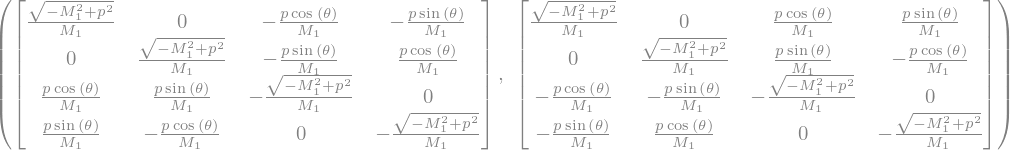

In [20]:
# pol, pol_, pol-, pol0, polbar, são os vetores de polarização dos bósons y, Z, W, onde bar é o complexo conjugado

# dag = slash operator, elementwise (v1, v2, v3, v4).(g0, g1, g2, g3), onde vn são os elentos de um quadrivetor.

eps1dag = hep.dag(hep.polbar(k1,0))

eps2dag = hep.dag(hep.polbar(k2,0))

eps1dag, eps2dag

--- 



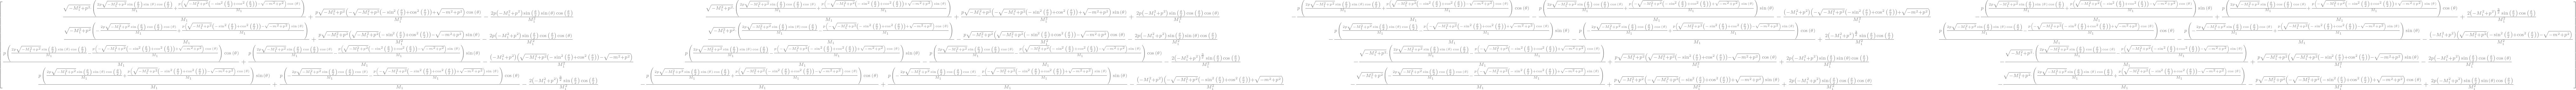

In [47]:
## some kernel of the amplitude expression with the epslon contained (WW)

Kern2 = eps2dag * qdag * eps1dag
Kern2

---

$$  \texttt{T1v1} = \bar v(p2, +)~P_L~ \texttt{Kern2} ~ u(p1, +) $$

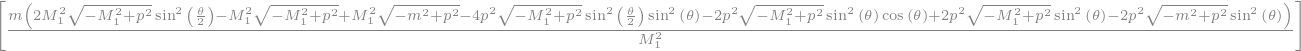

In [48]:
# v,u,bar stuff are for the spinors, and is like u(formomenta, helicity(+1,-1))

# projpl = PL, projpm = PR  are the gamma5 projection operators 

# latex = '$ \bar v(p2, +)~P_L~ kern2_latex~ u(p1, +)                      $ '

T1v1 = simplify(hep.vbar(p2,1) * hep.projpl * Kern2 * hep.u(p1,1));T1v1

-  Mandelstam at C.M.

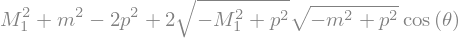

In [38]:
M = M1
tCM= m**2 + M**2 - 2*p**2 + 2*sqrt(p**2 - m**2) * sqrt(p**2  -  M**2) * cos(theta)

tCM

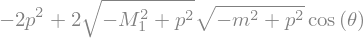

In [39]:
t0CM= tCM - m**2 - M**2
t0CM

In [41]:
sCM = 4 * p**2
sCM

---

- High energy limit:

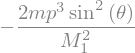

In [44]:
T1v2 =  -2 * p**3 * sin(theta)**2 * m/M1**2;    T1v2

---
Divide bei $q^2$ and multiply by $g^2/2$

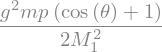

In [46]:
T1 = g**2 /2 /M1**2 * m * p *(1+cos(theta));T1

--- 
### 2) $e^-_+e^+_+\to W^-_0W^-_0$ Scalar $\phi $ in $s$-channel

$$  T2v1 = \bar v(p2, +) u(p1, +) ~ \bar \epsilon(k1, m) \cdot \bar \epsilon (k2, m) $$

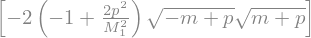

In [49]:
T2v1 = hep.vbar(p2,1) * hep.u(p1,1) * hep.dotprod4(hep.polbar(k1,0),hep.polbar(k2,0));T2v1

High energy limit, divide by denominator $s$ multiply with new couplings $c_1=c_{\phi ee}$, $c_2=c_{\phi WW}$

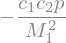

In [50]:
T2= -c1*c2*p / M1**2;T2

## 3) $e^-_+\bar{\nu} \rightarrow W^-_0 \phi$

a) $s$-channel, $g_{\mu\nu}$ Term in the propagator

In [51]:
p1=[p,m,0,0]
p2=[p,0,pi,pi]

In [52]:
jweak = hep.vbuw(p2,1,p1,1);jweak

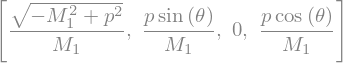

In [53]:
hep.polbar(k1,0)

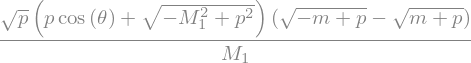

In [54]:
hep.dotprod4(jweak,hep.polbar(k1,0))

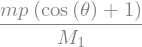

In [55]:
T3v1=m*p*(1+cos(theta))/M1;T3v1

Dividing by $s=4p^2$ shows that this part of the amplitude is not divergent.
One has to include the $q_\mu q_\nu/M_W^2$ term in the propagator

In [56]:
qvec=[2*p,0,0,0];qvec

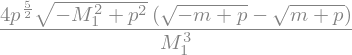

In [57]:
## THIS


T3v2 = hep.dotprod4(jweak, qvec) * hep.dotprod4(hep.polbar(k1,0), qvec)   /   M1**2;T3v2

High energy limit

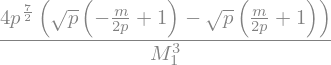

In [58]:
T3v3=T3v2.subs(sqrt(p-m),sqrt(p)*(1-m/2/p)).subs(sqrt(p+m),sqrt(p)*(1+m/2/p)).subs(sqrt(-M1**2+p**2),p);T3v3

Dividing by $s$  and including the couplings shows linear increase with $p$                 

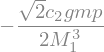

In [59]:
g/sqrt(2)*c2*simplify(T3v3)/4/p**2

---
---


## 2) New particle in $s$-channel


$$e^-_+(k_1)+e^+_+(p_1)\to W^-_0(k_2)+W^+_0(p_2)$$


$-\imath T_{fi}=\bar{v}(k_1)u(p_1)(-\imath g_{\phi ee})
\frac{-\imath}{s-M_\phi^2}
(-\imath g_{\phi WW}) g^{\mu\nu}\epsilon^*_\mu(k_2)\epsilon^*_\nu(p_2)$

$T_{fi}=-g_{\phi ee}g_{\phi WW}\bar{v}(k_1)u(p_1)\epsilon^*(k_2)\cdot\epsilon^*(p_2)/(s-M_\phi^2)$

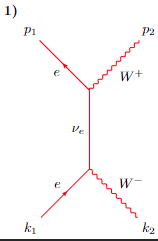

In [61]:
E1,M1,m,g=symbols('E1 M1 m g',positive=True)
theta,c1,c2=symbols('theta c1 c2',real=True)

In [62]:
k1=[E1,m,0,0]
p1=[E1,m,pi,pi]
k2=[E1,M1,theta,0]
p2=[E1,M1,pi-theta,pi]

In [60]:
T2v1=hep.vbar(k1,1)*hep.u(p1,1) * hep.dotprod4(hep.polbar(k2,0) , hep.polbar(p2,0));T2v1

---
---
---

## e e -> Z0 -> W+ W- test

In [2]:
from sympy import *
import prof_berger.heppackv0 as hep 

## latex não precisa de $
theta,u,t,r=symbols('theta u t r',real=True)

s, p, t0, s0, phi, P = symbols('s p t_0 s_0 phi P',positive=True)

MZ, MW, m= symbols(r'M_{Z} M_{W} m',real=True)

E, E1, E2, E3, E4 = symbols(r'E E_{1} E_{2} E_{3} E_{4}',real=True)

cv, ca = symbols(r'c_{V} c_{A}',real=True)
g,c1,c2=symbols('g c1 c2')

NameError: name 'symbols' is not defined

In [224]:
p1 = [E,m,0,0]
p2 = [E,m,pi,pi]
k1 = [E,MW,theta,0]
k2 = [E,MW,pi-theta,pi]

qvec = [2*E, 0,0,0]
qmunu = diag(4*E**2, 0,0,0)

$$ ee  -> Z -> WW $$ 

In [ ]:
# corrente entrada -> ???  ff -> Z0 * (dot) * corrente saida ->V3gOUTOUT

## PREMISSA:
## o propagador não precisa ser acrescentado quando multiplicamos as correntes. Já que os termos gmunu ou qmunu já estão inclusas.

In [ ]:
# ##
# def vbuva(p1, h1, p2, h2, cv, ca):
#     gv = cv / 2
#     ga = ca / 2
#     j0 = vbar(p1, h1) * g0 * (gv * one - ga * g5) * u(p2, h2)
#     j1 = vbar(p1, h1) * g1 * (gv * one - ga * g5) * u(p2, h2)
#     j2 = vbar(p1, h1) * g2 * (gv * one - ga * g5) * u(p2, h2)
#     j3 = vbar(p1, h1) * g3 * (gv * one - ga * g5) * u(p2, h2)
#     result = [simplify(j0[0]), simplify(j1[0]), simplify(j2[0]), simplify(j3[0])]
#     return result

In [225]:
denom = (hep.dotprod4(qvec, qvec)**2 - MZ**2) 
# propagator_1st = - I * (hep.Eins) / denom 
# propagator_2st = - I * (qmunu) / denom

In [226]:
jW_hel = []

for h1 in [-1, 1]:
    for h2 in [-1, 1]:
        jW_hel.append(hep.vbuva(p2, h2, p1, h1, cv, ca))

V3_hel = []
for h1 in [-1, 0, 1]:
    for h2 in [-1, 0, 1]:
        V3_hel.append(hep.V3gOutOut(k1, h2, k2, h1))


In [227]:
Tn = []


for jW in jW_hel:
    for V3 in V3_hel:

        Tn.append(hep.dotprod4(jW , V3))


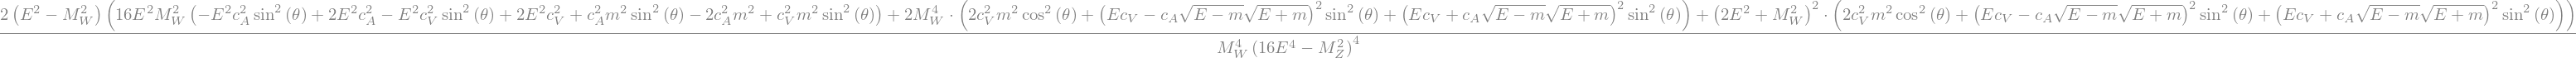

In [228]:
# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres = 0
for T in Tn:
    Tres += (T / denom**2) ** 2 ## Summing Squared


# Averaging
Tres = simplify(Tres / 2); Tres


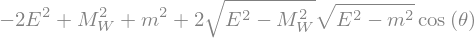

In [230]:
# Mandelstam in CM frame 

tCM=m**2 + MW**2 - 2*E**2 + 2*sqrt(E**2 - m**2) * sqrt(E**2 - MW**2) * cos(theta)

cost = -(m**2 + MW**2 - 2*E**2) / (2*sqrt(E**2 - m**2) * sqrt(E**2 - MW**2))

tCM

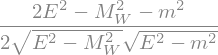

In [231]:
cost

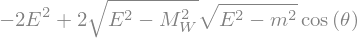

In [232]:
t0CM = tCM - m**2 - MW**2
t0CM

In [233]:
sCM = 4*E**2
sCM

In [234]:
Tres_simp = simplify(Tres.subs(sCM, s).subs(tCM, t).subs(t0CM, t0).subs(cos(theta), cost).subs(E, sqrt(s)/2))

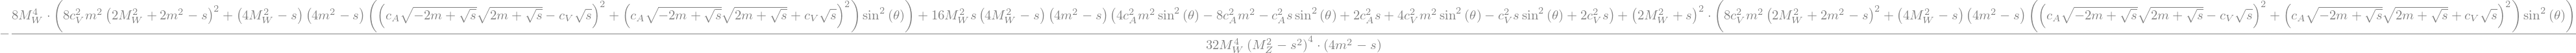

In [235]:
Tres_simp

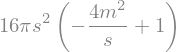

In [236]:
## Golden factor
factor=16*pi*s**2*(1-4*m**2/s)
factor

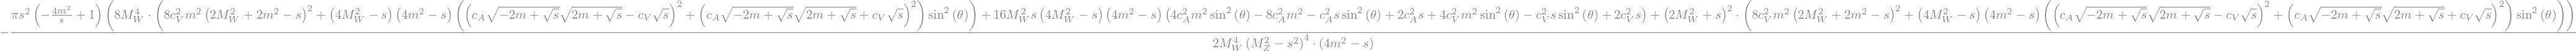

In [237]:
dsig_dt = factor * Tres_simp
dsig_dt

In [238]:
# m-> 0

dsig_dt = dsig_dt.subs(m,0)

In [239]:
totalxsec = 2*pi*integrate(sin(theta)*dsig_dt,(theta,0,pi))

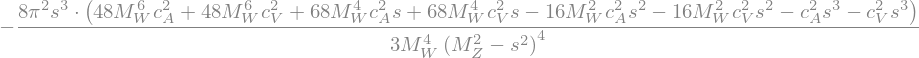

In [240]:
totalxsec = simplify(totalxsec)
totalxsec

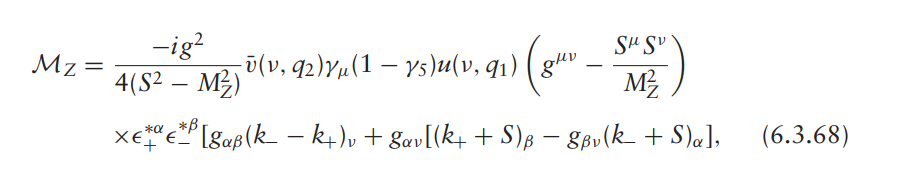

abrir a conta acima e ver se bate com o que eu fiz

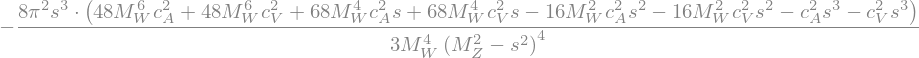

In [220]:
totalxsec

In [242]:
simplify(totalxsec.subs(cv, (-1/2 + 1)).subs(ca, (-1/2)).subs(MZ, 0).subs(MW, 0).subs(pi, 3.1415).subs(s, (82**2)))*0.3894

In [ ]:
10-13 pb ??

In [ ]:
\sigma = \frac{1}{4\pi}\frac{(0.652\cos^2\theta_W + 0.348\sin^2\theta_W)^2}{(91.2\text{ GeV})^2}
\sigma \approx 36.1\text{ pb}
Portanto, a seção de choque no pico de ressonância do processo eletron-positron -> Z -> WW é de aproximadamente 36,1 pb.

$$ \sigma = \frac{1}{4\pi}\frac{(g_Z^2\cos^2\theta_W + g_Z^2\sin^2\theta_W)^2}{s} $$ 

$$ \sigma = \frac{1}{4\pi}\frac{(0.652\cos^2\theta_W + 0.348\sin^2\theta_W)^2}{(91.2\text{ GeV})^2} $$

#### Examples from SymPy

In [1]:
import sympy as sp
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex
from sympy.tensor.tensor import tensor_indices
i = tensor_indices('i', LorentzIndex)

In [12]:
from sympy.physics.hep.gamma_matrices import GammaMatrix as G,         gamma_trace, LorentzIndex
from sympy.tensor.tensor import tensor_indices, tensor_heads
p, q = tensor_heads('p, q', [LorentzIndex])
i0,i1,i2,i3,i4,i5 = tensor_indices('i0:6', LorentzIndex)
ps = p(i0)*G(-i0)
qs = q(i0)*G(-i0)
gamma_trace(G(i0)*G(i1))
gamma_trace(ps*ps) - 4*p(i0)*p(-i0)
gamma_trace(ps*qs + ps*ps) - 4*p(i0)*p(-i0) - 4*p(i0)*q(-i0)

0

In [11]:
LorentzIndex.metric

metric(LorentzIndex,LorentzIndex)

#### ChatGPT e-e+ example

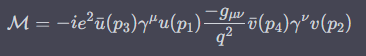

In [41]:
import sympy as sp
from sympy.physics.hep.gamma_matrices import GammaMatrix as G, LorentzIndex
from sympy.tensor.tensor import tensor_indices

# Definir variáveis simbólicas
s, t, u, alpha, e, m_e, theta, phi, p1x, p1y, p1z, p2x, p2y, p2z, p3x, p3y, p3z, p4x, p4y, p4z = sp.symbols(
    r's t u {\alpha} e {m_{e}} theta phi p1x p1y p1z p2x p2y p2z p3x p3y p3z p4x p4y p4z', real=True)

# Definir constantes físicas
#alpha = sp.Rational(1, 137)  # Constante de estrutura fina
e = sp.sqrt(4 * sp.pi * alpha)  # Carga do elétron
#m_e = 0.511  # Massa do elétron em MeV/c^2

# Definir tensores de Dirac para elétrons e pósitrons -- SPINORES
u1 = sp.Matrix([[sp.sqrt(m_e), 0, p1z / sp.sqrt(m_e), (p1x + sp.I * p1y) / sp.sqrt(2 * m_e)]])
u2 = sp.Matrix([[sp.sqrt(m_e), 0, p2z / sp.sqrt(m_e), (p2x + sp.I * p2y) / sp.sqrt(2 * m_e)]])
v3 = sp.Matrix([[sp.sqrt(m_e), 0, p3z / sp.sqrt(m_e), (p3x - sp.I * p3y) / sp.sqrt(2 * m_e)]])
v4 = sp.Matrix([[sp.sqrt(m_e), 0, p4z / sp.sqrt(m_e), (p4x - sp.I * p4y) / sp.sqrt(2 * m_e)]])

## Assumptions

p1z = -p2z
p3z = -p4z



# Definir fatores cinemáticos
s_expr = (u1 + u2).dot(u1 + u2)
# t_expr = (u1.dot(v4)).simplify()
# u_expr = (u1.dot(v3)).simplify()


In [43]:
from sympy.physics.hep.gamma_matrices import GammaMatrix as G,  gamma_trace, LorentzIndex
from sympy.tensor.tensor import tensor_indices, tensor_heads
p, q = tensor_heads('p, q', [LorentzIndex])
i0,i1,i2,i3,i4,i5 = tensor_indices('i0:6', LorentzIndex)
ps = p(i0)*G(-i0)
qs = q(i0)*G(-i0)

In [ ]:
class Spinor(class)

In [48]:
p(i0) + q(i0)

p(i0) + q(i0)

In [42]:
s_expr

4*{m_{e}} + (p1z/sqrt({m_{e}}) + p2z/sqrt({m_{e}}))**2 + (sqrt(2)*(p1x + I*p1y)/(2*sqrt({m_{e}})) + sqrt(2)*(p2x + I*p2y)/(2*sqrt({m_{e}})))**2

In [39]:
u1

Matrix([[sqrt({m_{e}}), 0, p1z/sqrt({m_{e}}), sqrt(2)*(p1x + I*p1y)/(2*sqrt({m_{e}}))]])

In [ ]:

# Lagrangiana de interação
L_interaction = -e * u1.conjugate() * G * u2 * epsilon_μ

# Amplitude de espalhamento (utilizando matriz de vértice simplificada)
M = -e * sp.I * sp.gamma(μ) * (sp.fj + sp.fγ - m_e) * sp.gamma(ν) / (t - m_e**2)

# Amplitude completa
amplitude = (sp.I**2 / (s * t)) * (u1[0].conjugate() * M * v4[0]) * (u2[0].conjugate() * epsilon_μ * v3[0]).conjugate()

# Agora, você pode calcular a seção de choque total, que envolve integração sobre os ângulos
# A seção de choque total (sigma) é proporcional ao quadrado da amplitude (|A|^2)
sigma = (1 / (64 * sp.pi**2 * s)) * sp.integrate(sp.Abs(amplitude)**2, (theta, 0, sp.pi), (phi, 0, 2*sp.pi))


## Scattering Amplitude

In [ ]:
## Eq 2.36 
def somm_corr():

    expr1 = r"\frac{\pi x}{1-e^{-\pi x}}"
    expr2 = r"\prod_{b = 1}^{l} (1 + \frac{x^2}{4b^2} )"
    
    fact1 = parse_latex(expr1)
    fact2 = parse_latex(expr2)


    result = fact1*fact2

    return result

# Test
somm = somm_corr()
somm

In [28]:

from scipy.integrate import quad
erroabs = 1E-2
errorel = 1E-2
intlimit = 10

xgmin = 0.01 ## 4% do feixe
xgmax = 0.66 ## 66% do feixe


xgmin  = 0.010
xgmax = 0.100

@np.vectorize
def HPhsig_new(s, mq, Mmed, mx, gr, gl, gx, sig0):

    ### CLIC CONSTRAINTS ####
    # A = 0.060 ## E_min = 0.060 TeV
    # xgmin = (2 * A) / np.sqrt(s)
    # qmax = 1.0 ## E_max = 1 TeV
    # xgmax = (2 * qmax) / np.sqrt(s)
    

    @np.vectorize
    def integrand_xg(xg, s, mq, Mmed, mx, gr, gl, gx, sig0):

        preterm   = 1 / xg
        integrand = (1 - (xg) + ((xg**2) / 2))
        sigcorr   = sig0(s*(1-xg), mq, Mmed, mx, gr, gl, gx) / sig0(s, mq, Mmed, mx, gr, gl, gx)
        result    = preterm * integrand * sigcorr
        return result

    def i_argument(x):
        result = integrand_xg(x, s, mq, Mmed, mx, gr, gl, gx, sig0)
        return result
    
    #integral = quad(integrand_xg, xgmin, xgmax, args=(s, mq, Mmed, mx, gr, gl, gx, sig0), limit=intlimit, epsabs=erroabs, epsrel=errorel)[0] ## x1 integration!! - The result is tau*\integral{f(x)} (mq is set to 0 because python errors in this phase)      
    integral = fortran_quad.quad16(i_argument, xgmin, xgmax)

    parentesis1  = (-1 + 2*np.log10(np.sqrt(s)/mq))         ## sempre positivo
    parentesis2  = (np.log10(xgmin) + (13/12) + integral)   ## positivo para xgmin > 0.083, a integral é sempre positiva
    termcte      = ((-17/36) + (1/6)*(np.pi**2))            ## sempre positivo, = 1.17271184
    keys_tot     = (parentesis1 * parentesis2)  + termcte   ## positivo se parentesis2 for positivo
    delta        = ((2*alph/np.pi)*keys_tot)
    hp           = sig0(s, mq, Mmed, mx, gr, gl, gx) * (1 + delta )  ## xsec sempre positiva
    return hp

In [29]:
###########################     PARAMETERS     ##################################
binsize = 20
s_var = np.arange(1.5, 5.5, 1/binsize)  # mediator mass [TeV]
mx = 0.001
Mmed = 3.0 # TeV
gr = gl = 0.25 # variação do valor do acoplamento direito
gx = 1 # variação do valor do acoplamento escuro´

mq = mvec[0] ## electron mass 

################################################################################

HPhsig_new(s_var, mq, Mmed, mx, gr, gl, gx, SFV('Scalar').sig0)*brn

array([ 25.91846733,  27.14625333,  28.40387243,  29.69213701,
        31.01188816,  32.3639967 ,  33.7493643 ,  35.16892457,
        36.62364433,  38.11452481,  39.64260309,  41.20895343,
        42.81468881,  44.46096249,  46.14896966,  47.87994915,
        49.6551853 ,  51.47600984,  53.34380394,  55.26000029,
        57.22608538,  59.24360183,  61.31415084,  63.43939483,
        65.62106015,  67.86093999,  70.16089737,  72.5228684 ,
        74.94886562,  77.44098157,  80.00139253,  82.63236247,
        85.33624727,  88.11549907,  90.97267099,  93.91042199,
        96.93152212, 100.038858  , 103.23543866, 106.52440165,
       109.90901961, 113.39270717, 116.97902823, 120.67170377,
       124.47462004, 128.39183732, 132.42759916, 136.58634225,
       140.87270689, 145.29154808, 149.84794738, 154.5472255 ,
       159.39495568, 164.39697804, 169.55941472, 174.88868619,
       180.39152856, 186.07501207, 191.94656087, 198.01397415,
       204.28544875, 210.76960334, 217.47550432, 224.41

Doing Scalar
Doing Fermion
Doing Vector


/tmp/ipykernel_1462/2950478411.py:98: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


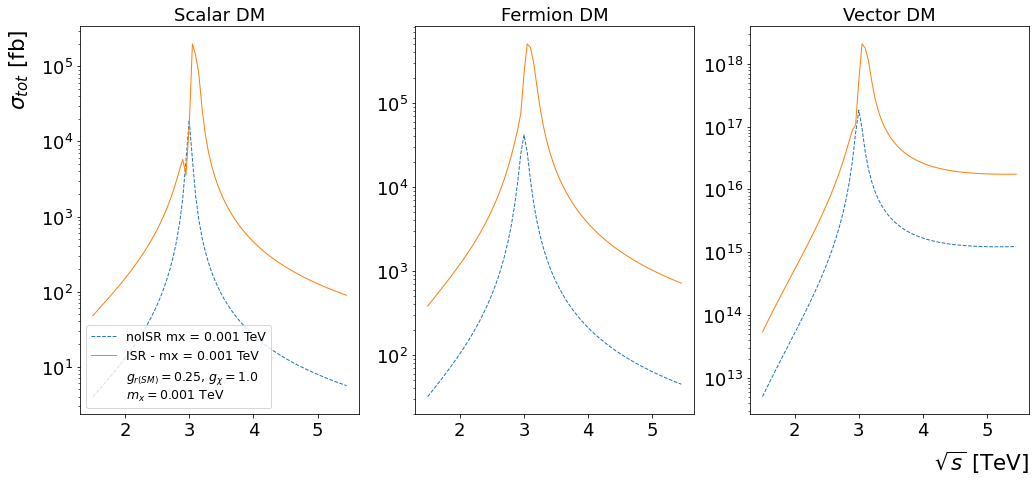

In [30]:

fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}




for fignumber, dmname in enumerate(dmnames):
    if fignumber == 0:
        fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize=(17,7))

        # ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
        #                 nrows_ncols=(1,3),
        #                 axes_pad=(0.15, 0.0),
        #                 share_all=False,
        #                 #cbar_location="right",
        #                 #cbar_mode="single",
        #                 #cbar_size="5%",
        #                 #cbar_pad=0.10,
        #                 aspect=False
        #                 )

    print(f'Doing {dmname}')
    xg = 0
    sig0funcs = SFV(dmname).sig0
    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    
    
    ## ee

    ax[fignumber].plot(s_var, SFV(dmname).sig0(s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, linestyle='dashed', label=rf'noISR mx = {mx} TeV')
    
    ## ee - ISR
    ax[fignumber].plot(s_var, HPhsig_new(s_var**2, mq, Mmed, mx, gr, gl, gx, SFV(dmname).sig0)*brn, linewidth=1.0, label=f'ISR - mx = {mx} TeV')
    
    ######################################################################################################
    # # pp
    # #define pdf
    # PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
    # pdf = lhapdf.mkPDF(PDF_sets[1], 0)

    # ###### no ISR
    # sigmazqqNOISR[f'{dmname}'] = dsigdM2_noISR2(pdf, s_max, s_var/s_max, Mmed, 1, mx, gr, gr, gx, SFV(dmname).sig0)
    # #sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    # sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    # ax[fignumber].plot(np.sqrt(s_var), sigmazqqNOISR[f'{dmname}']*brn, linewidth=1.0, label=r'$pp$ - Tree Process')
    
    # ###### ISR
    # sighat_hphoton[f'{dmname}'] = HPhsig(0, s_var, mvec[0], Mmed, mx, gr, gr, gx, sig0funcs)
    # sigmazqqISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, s_var/s_max, Mmed, 1, mx, gr, gr, gx, sighat_hphoton[f'{dmname}'])

    
    # ax[fignumber].plot(np.sqrt(s_var), sigmazqqISR[f'{dmname}']*brn, linewidth=1.0, label=r'$pp$ - ISR emission')
    
    
    ## Plot Labels ##
    fig.set_dpi(72)
    ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[fignumber].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_x = {mx}$ TeV'))


    if fignumber == 0:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    LEG =  ax[0].legend(loc='lower left', fontsize = fsize-5.5)

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 2:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.12,r'$ \sqrt{s}$ [TeV]',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7,r'$\sigma_{tot}$ [fb]',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

    if fignumber == 2:
        fig.set_dpi(72)
        fig.savefig('figures/peak_comp_SFV-ee-oficial2.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################

LHAPDF 6.4.0 loading /usr/local/share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000


/tmp/ipykernel_32508/2782968498.py:59: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LHAPDF 6.4.0 loading /usr/local/share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000


/tmp/ipykernel_32508/2782968498.py:59: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LHAPDF 6.4.0 loading /usr/local/share/LHAPDF/NNPDF31_lo_as_0118/NNPDF31_lo_as_0118_0000.dat
NNPDF31_lo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 315000


/tmp/ipykernel_32508/2782968498.py:59: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
/tmp/ipykernel_32508/2782968498.py:108: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


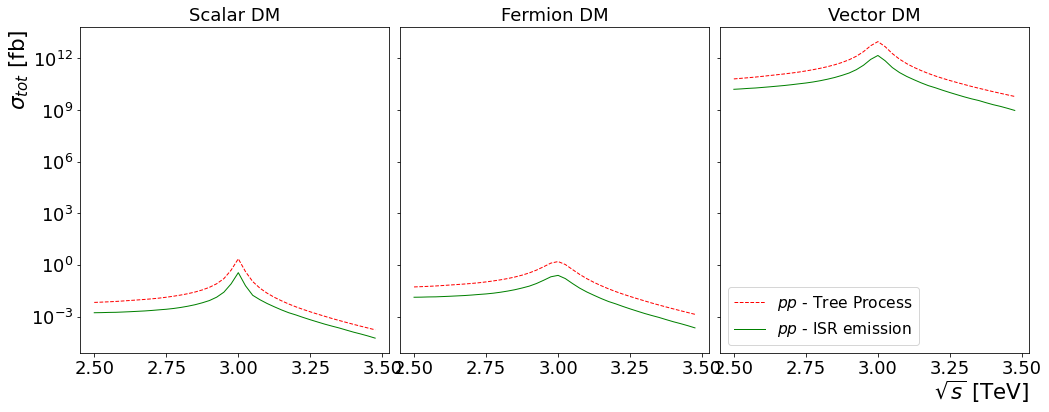

In [10]:
###########################     PARAMETERS     ##################################
binsize = 40
s_var = (np.arange(2.5, 3.5, 1/binsize))**2  # mediator mass [TeV]
s_max = 5**2
mx = 0.001 # DM mass [TeV]
Mmed = 3.0 # TeV
gr = gl = 0.25 # variação do valor do acoplamento direito
gx = 1 # variação do valor do acoplamento escuro´

mq = mvec[0] ## electron mass 

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}




for fignumber, dmname in enumerate(dmnames):
    if fignumber == 0:
        fig = plt.figure(figsize=(17, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.15, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0
    sig0funcs = SFV(dmname).sig0
    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    
    
    # ## ee
    # ax[fignumber].plot(np.sqrt(s_var), SFV(dmname).sig0(xg, s_var, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'$e^{+}e^{-}$ - Tree Process')
    
    # ## ee - ISR
    # ax[fignumber].plot(np.sqrt(s_var), HPhsig(xg, s_var, mq, Mmed, mx, gr, gl, gx, SFV(dmname).sig0)*brn, linewidth=1.0, label=r'$e^{+}e^{-}$ - ISR emission')
    
    # ######################################################################################################
    # # pp
    #define pdf
    PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
    pdf = lhapdf.mkPDF(PDF_sets[1], 0)

    ###### no ISR
    sigmazqqNOISR[f'{dmname}'] = dsigdM2_noISR2(pdf, s_max, s_var/s_max, Mmed, 1, mx, gr, gr, gx, SFV(dmname).sig0)
    #sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    ax[fignumber].plot(np.sqrt(s_var), sigmazqqNOISR[f'{dmname}']*brn, linewidth=1.0, linestyle='dashed',color='red', label=r'$pp$ - Tree Process')
    
    ###### ISR
    sighat_hphoton[f'{dmname}'] = HPhsig(0, s_var, mvec[0], Mmed, mx, gr, gr, gx, sig0funcs)
    sigmazqqISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, s_var/s_max, Mmed, 1, mx, gr, gr, gx, sighat_hphoton[f'{dmname}'])

    
    ax[fignumber].plot(np.sqrt(s_var), sigmazqqISR[f'{dmname}']*brn, linewidth=1.0,color='green', label=r'$pp$ - ISR emission')
    
    
    ## Plot Labels ##
    fig.set_dpi(72)
    ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_x = {mx}$ TeV'))


    if fignumber == 0:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    LEG =  ax[2].legend(loc='lower left', fontsize = fsize-2.5)

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 2:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.12,r'$ \sqrt{s}$ [TeV]',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7,r'$\sigma_{tot}$ [fb]',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

    if fignumber == 2:
        fig.set_dpi(72)
        fig.savefig('figures/peak_comp_SFV-qq-oficial.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################